### Noah Collin
### Data 602
### Week 11 discussion


    These questions relate to the seaborn library.


    1. How do you plot a histogram in Seaborn?  

    2. Plot a histogram with NAs dropped.

    3. How do you set the color for a histogram?

    4.  What type of plot would allow you to compare two continuous features?  Give an example of code.

    5. Give example of a correlation plot.

    6. Change the figure size of your plot(s).


    You can use any dataset for examples to these questions. Some datasets can be found using seaborn: https://seaborn.pydata.org/generated/seaborn.load_dataset.html 



In [1]:
import seaborn as sns

### Titanic Dataset

In [2]:
titanicData = sns.load_dataset("titanic")

In [31]:
titanicData.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### 1. How do you plot a histogram in Seaborn?  


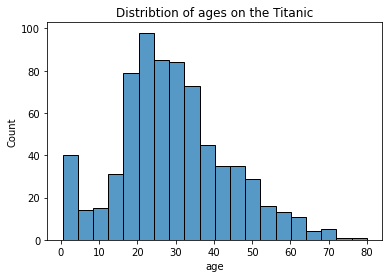

In [7]:
sns.histplot(titanicData['age']).set(title="Distribtion of ages on the Titanic");

#### #2. Plot a histogram with NAs dropped.

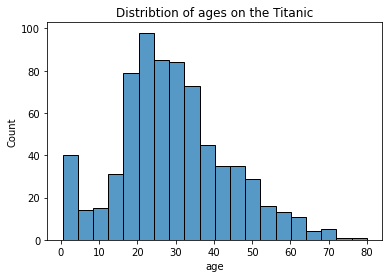

In [8]:
sns.histplot(titanicData['age'].dropna()).set(title="Distribtion of ages on the Titanic");

In [14]:
titanicData.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanicNoNullAges = titanicData.dropna(subset = "age")

In [17]:
titanicNoNullAges.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

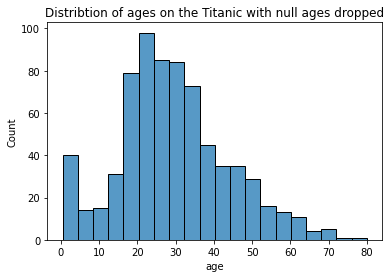

In [18]:
sns.histplot(titanicNoNullAges['age'].dropna()).set(title="Distribtion of ages on the Titanic with null ages dropped");

Looks exaxctly the same despite dropping 177 values, whatevs

#### 3. How do you set the color for a histogram?
#You can use the hue to set a category to be deliniated by color.  You can modify the colors with the palette argument

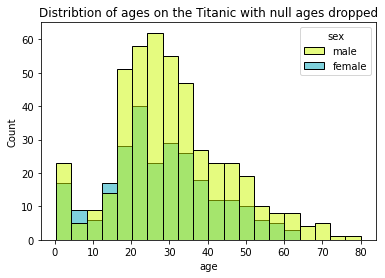

In [29]:
sns.histplot(data = titanicNoNullAges, x = 'age', hue = 'sex', palette = 'nipy_spectral_r')\
.set(title="Distribtion of ages on the Titanic with null ages dropped");

#### 4.  What type of plot would allow you to compare two continuous features?  Give an example of code.

[Text(0.5, 1.0, 'Age vs Fare on the Titanic')]

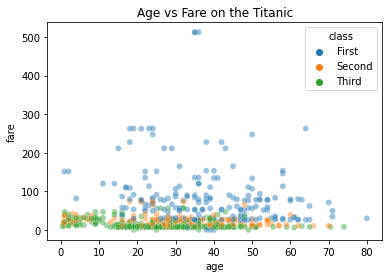

In [35]:
#scatter plot
sns.scatterplot(data = titanicNoNullAges, x = "age", y = 'fare', hue = 'class', alpha = .45).set(title = "Age vs Fare on the Titanic")

They look like particles falling to the ocean floor...

#### 5. Give example of a correlation plot.

In [44]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


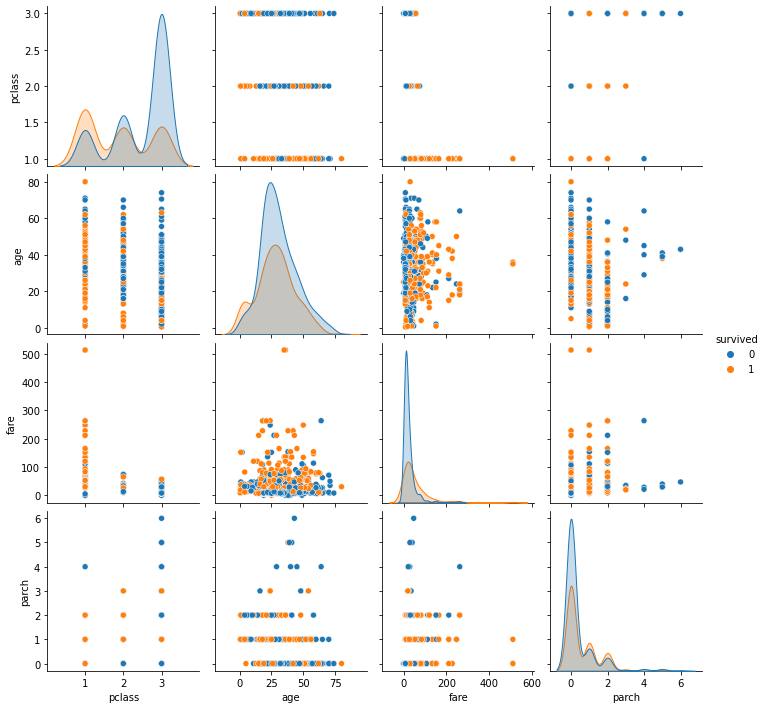

In [46]:
sns.pairplot(titanicNoNullAges[['survived', 'pclass', 'age', 'fare', 'parch']].dropna(), hue = 'survived');

#### 6. Change the figure size of your plot(s).

two methods found here:
    https://www.statology.org/seaborn-figure-size/

Method 1:

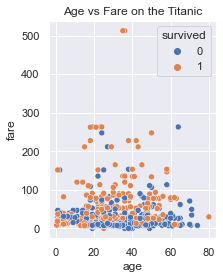

In [74]:
sns.set(rc={"figure.figsize":(3, 4)})
sns.scatterplot(data = titanicNoNullAges, x = 'age', y= 'fare', hue = 'survived').set(title = 'Age vs Fare on the Titanic');

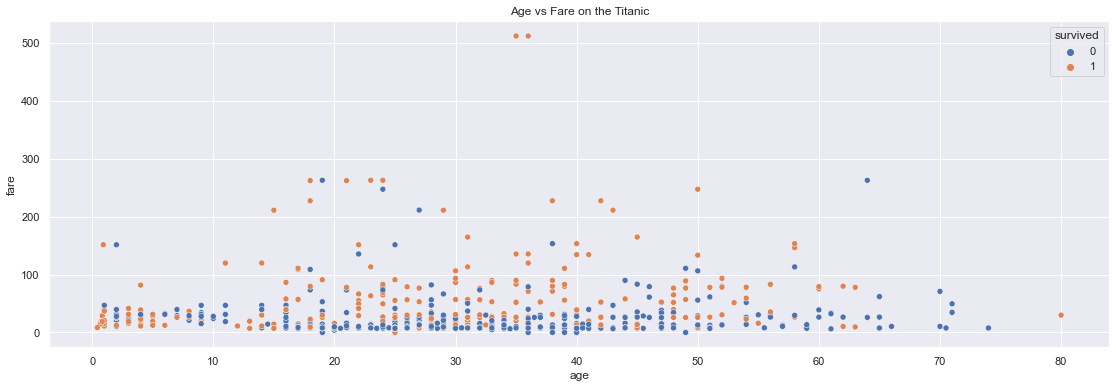

In [75]:
sns.set(rc={"figure.figsize":(19, 6)})
sns.scatterplot(data = titanicNoNullAges, x = 'age', y= 'fare', hue = 'survived').set(title = 'Age vs Fare on the Titanic');

Method 2:

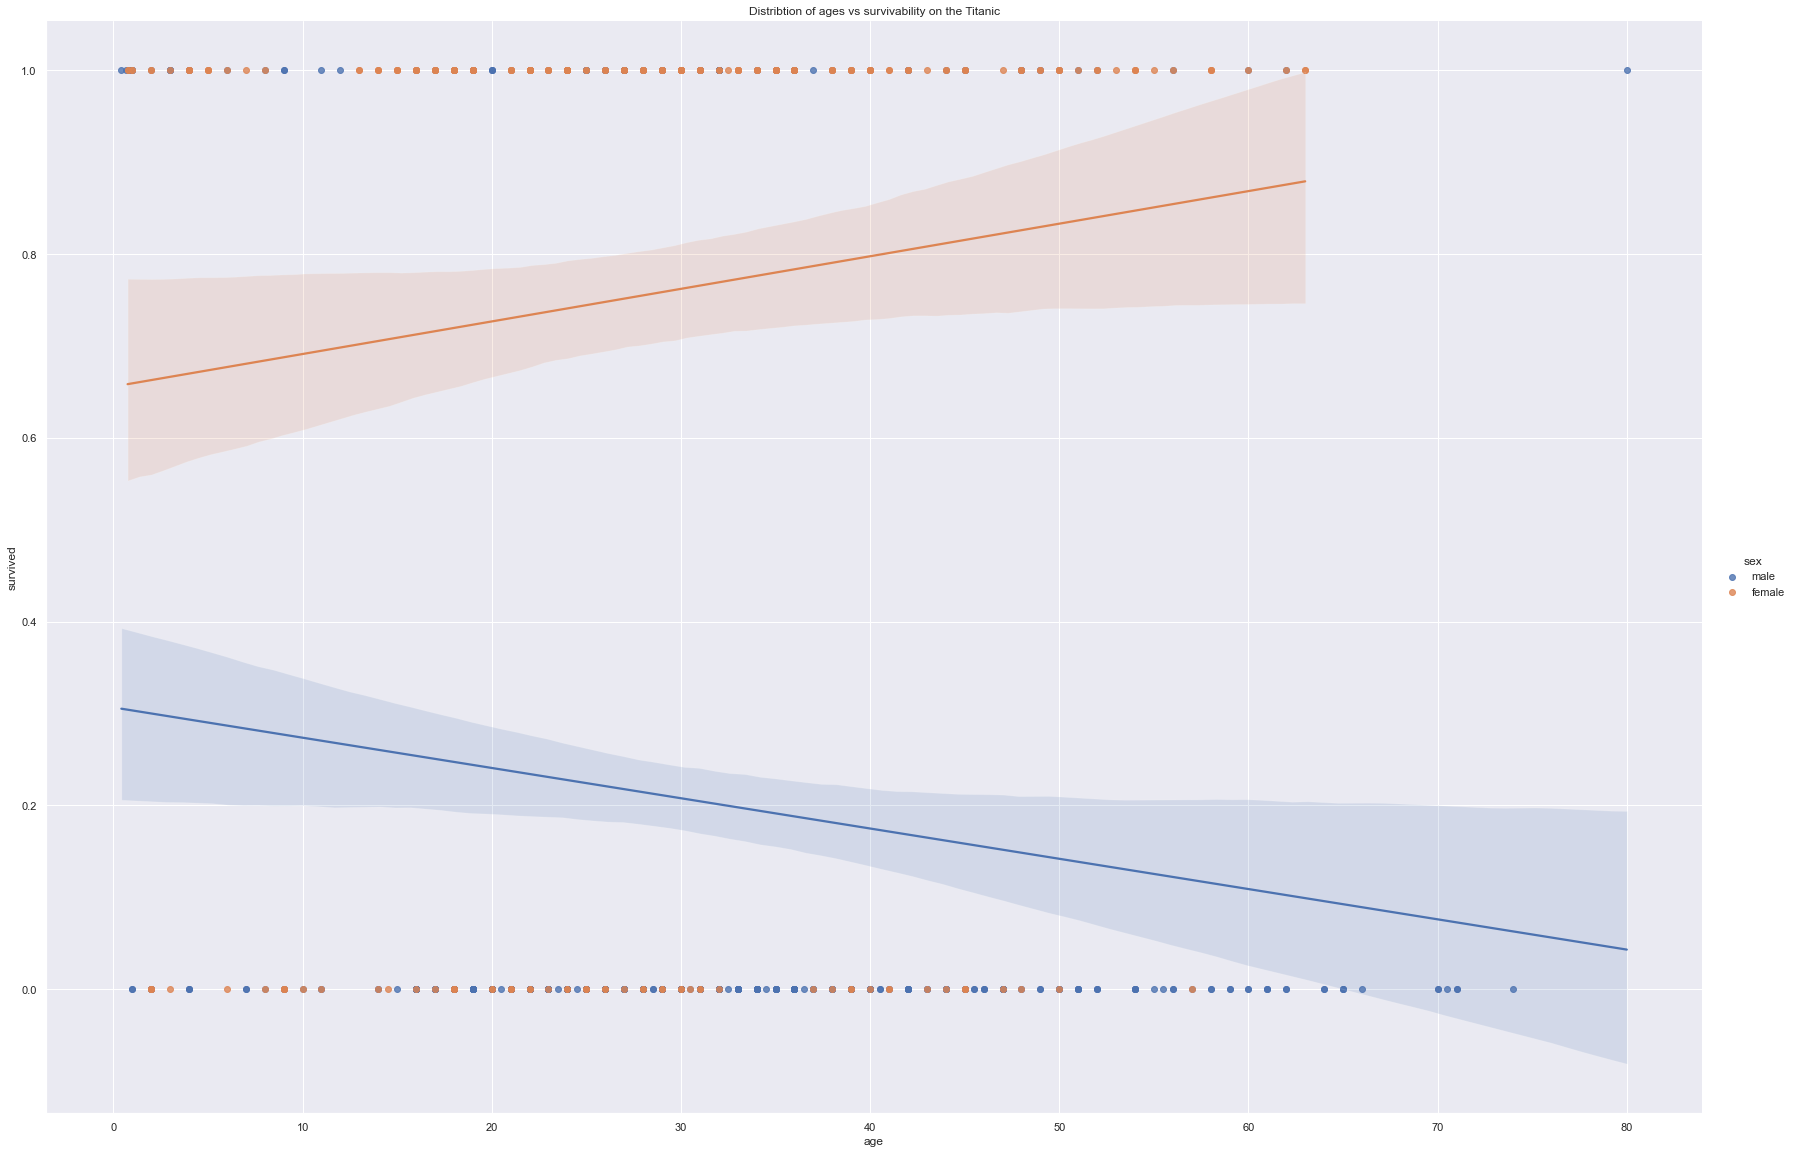

In [76]:
sns.lmplot(data = titanicData, x = 'age', y = 'survived', hue = 'sex',
             height = 16, aspect=1.5).set(title="Distribtion of ages vs survivability on the Titanic");

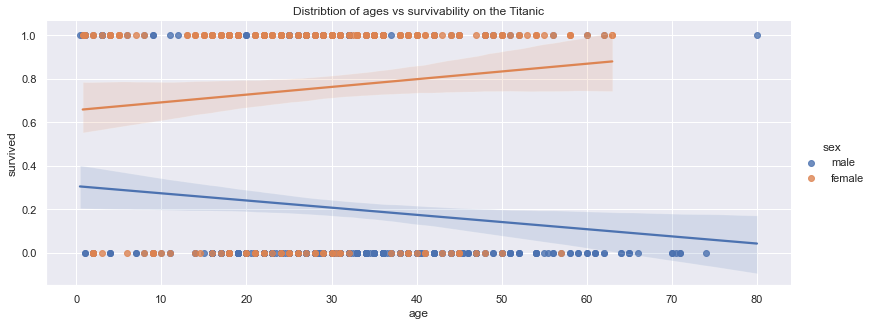

In [77]:
sns.lmplot(data = titanicData, x = 'age', y = 'survived', hue = 'sex',
             height = 4.5, aspect=2.5).set(title="Distribtion of ages vs survivability on the Titanic");